<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<ipython-input-1-e9974d54fae0>:39: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


Training split input-  (120, 4)
Testing split input-  (30, 4)
Decision Tree Classifer Created
Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



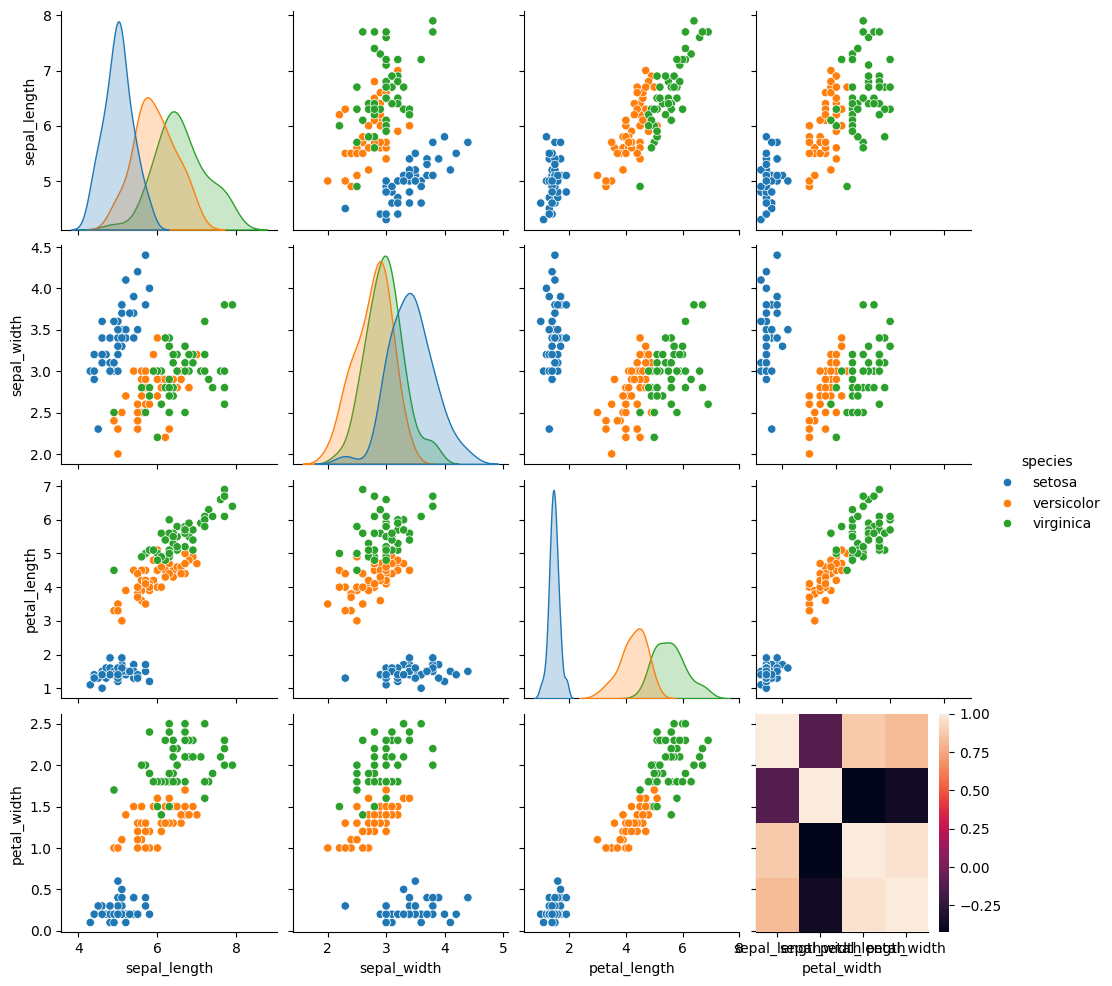

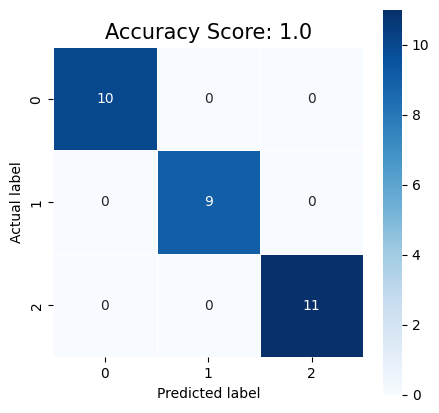

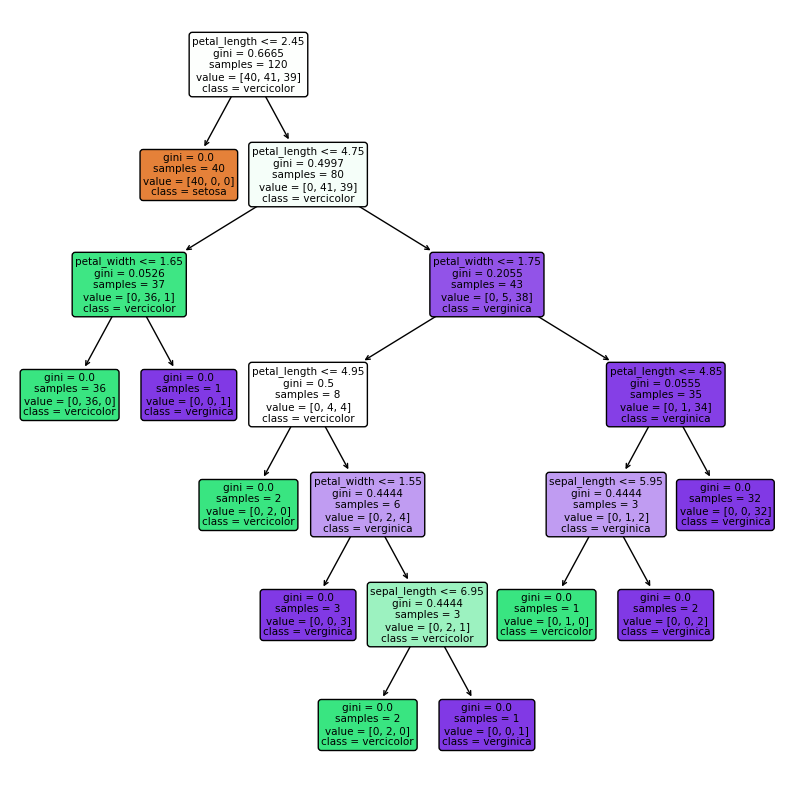

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
#for encoding
from sklearn.preprocessing import LabelEncoder
#for train test splitting
from sklearn.model_selection import train_test_split
#for decision tree object
from sklearn.tree import DecisionTreeClassifier
#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix
#for visualizing tree
from sklearn.tree import plot_tree
# to know all the available dataset
# sns.get_dataset_names()
#reading the data
#df=pd.read_csv("/content/id3.csv")
df = sns.load_dataset('iris')
df.head()

#If you have it in your system
#df = pd.read_csv('Iris.csv', index_col = 0)
#df.head()
#getting information of dataset

df.info()

df.isnull().any()

df.shape

# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'species')
plt.savefig("pne.png")

# correlation matrix
sns.heatmap(df.corr())
plt.savefig("one.png")

target = df['species']
df1 = df.copy()
df1 = df1.drop('species', axis =1)
df1.shape

df1.head()

# Defining the attributes

X = df1
target

#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
target

y = target
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state =42)

print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

# Defining the decision tree algorithm

dtree=DecisionTreeClassifier()

dtree.fit(X_train,y_train)
print('Decision Tree Classifer Created')

# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm

plt.figure(figsize=(5,5))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True, cmap = 'Blues')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

plt.savefig("one.png")

# Visualising the graph without the use of graphviz

plt.figure(figsize = (10,10))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns,
class_names =["setosa", "vercicolor", "verginica"] , filled = True ,precision = 4, rounded = True)

plt.savefig("one.png")